In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
import seaborn as sns
sns.set_theme(style="whitegrid")

file_path = "./data/loan_data_set.csv"
data = pd.read_csv(file_path)
df  = pd.DataFrame(data)
df = df.replace("", 0)
df = df.replace(" ", 0)
df = df.replace(np.nan, 0)

A) Pie chart – Plot percentage of applicant according to city/state/country

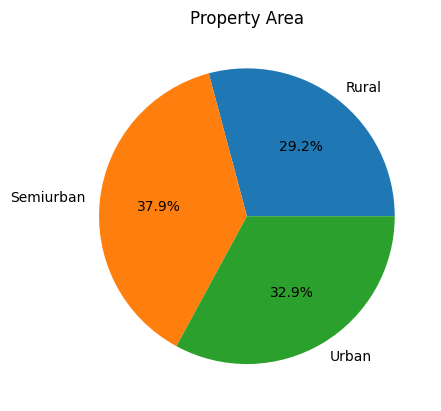

In [3]:
def getPareaLen(slug):
    grp = df.groupby('Property_Area').get_group(f'{slug}')
    return len(grp)

pie_data = [getPareaLen('Rural'), getPareaLen('Semiurban'), getPareaLen('Urban')]
pie_labels = ['Rural', 'Semiurban', 'Urban']
plt.pie(pie_data, labels=pie_labels, autopct='%1.1f%%')
plt.title('Property Area')
plt.show()

B) Bar chart – Plot the percentage of male/female applicants with respect to their Property Area for comparison.

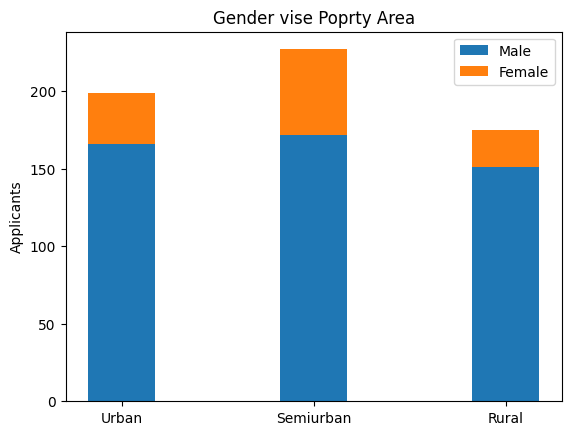

In [4]:
def getGenderLen(slug):
    grp1 = df.groupby('Gender').get_group(f'{slug}').groupby('Property_Area').get_group('Urban')
    grp2 = df.groupby("Gender").get_group(f'{slug}').groupby('Property_Area').get_group('Semiurban')
    grp3 = df.groupby("Gender").get_group(f'{slug}').groupby('Property_Area').get_group('Rural')
    return [len(grp1), len(grp2), len(grp3)]

male = getGenderLen("Male")
female = getGenderLen("Female")
x = np.arange(3)
width = 0.35
fig, ax = plt.subplots()
rects1 = ax.bar(x, male, width)
rects2 = ax.bar(x, female, width, bottom = male)
ax.set_ylabel('Applicants')
ax.set_title("Gender vise Poprty Area")
ax.set_xticks(x, ["Urban", "Semiurban", "Rural"])
ax.legend((rects1[0], rects2[0]), ("Male", "Female"))
plt.show()

C) Histograms – Plot the applicant with respect to their monthly/annually income. 

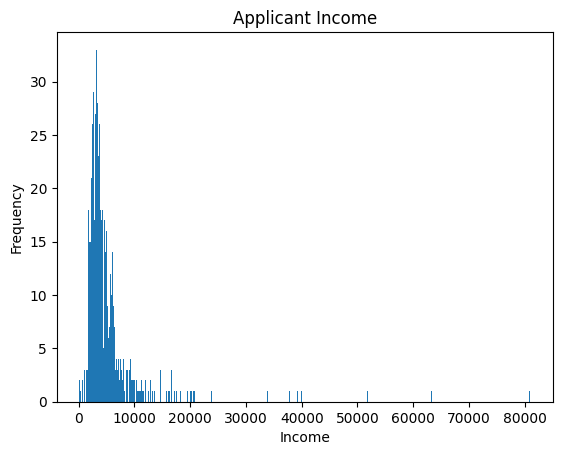

In [5]:
inc_data = list(df['ApplicantIncome'])
fig, ax = plt.subplots()
ax.hist(inc_data, bins=500, linewidth=5)
ax.set_title("Applicant Income")
ax.set_xlabel("Income")
ax.set_ylabel("Frequency")
plt.show()

 D) Boxplot – Plot this with respect to the loan amount.

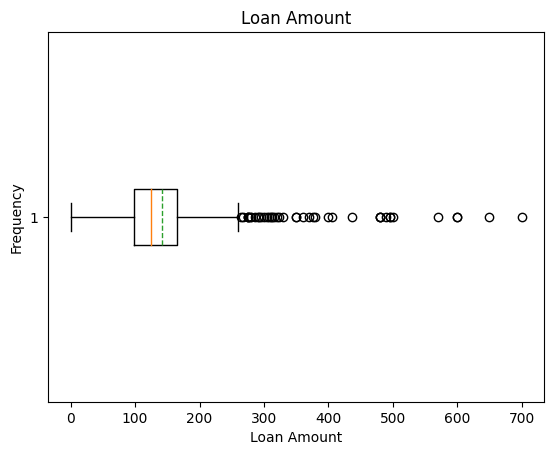

In [10]:
loan_data = list(df['LoanAmount'])
fig, ax = plt.subplots()
ax.boxplot(loan_data, vert=False, showmeans=True, meanline=True)
ax.set_title("Loan Amount")
ax.set_xlabel("Loan Amount")
ax.set_ylabel("Frequency")
plt.show()

E) Scatterplot – Plot this with respect to Property Area and loan amount of applicant and group them
accordingly

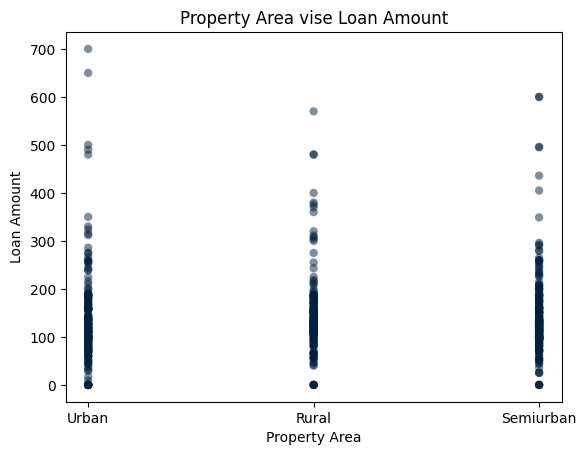

In [19]:
x = df['Property_Area']
y = df['LoanAmount']
fig, ax = plt.subplots()
ax.scatter(x, y, c="#00203FFF", alpha=0.5, edgecolors='none')
ax.set_title("Property Area vise Loan Amount")
ax.set_xlabel("Property Area")
ax.set_ylabel("Loan Amount")
plt.show()

F) Countplot - Plot this with respect to the number of loan applicants according to their loan amount term.

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='count'>

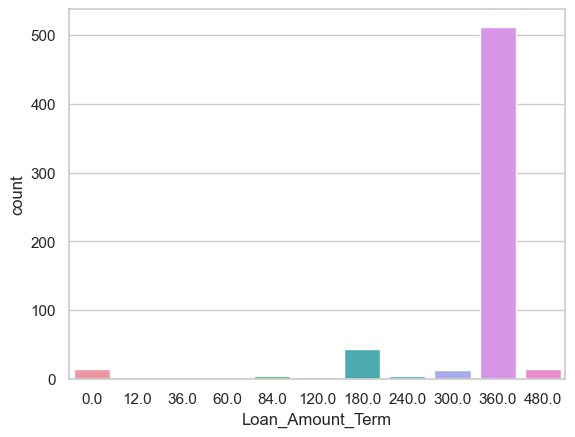

In [43]:
sns.countplot(df, x=df['Loan_Amount_Term'])

G) Heatmap – Plot this with respect to the applicant income, loan amount and loan amount term.

C:\Users\Jeel Gajera\AppData\Local\Temp\ipykernel_9476\621126171.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<AxesSubplot:>

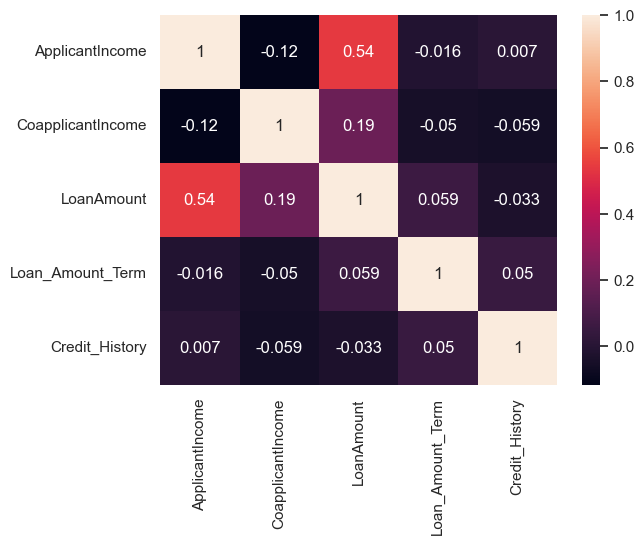

In [66]:
sns.heatmap(df.corr(), annot=True)